# Data Exploration & Data Modelling
## Analysing Absenteeism at a Courier Company
## Author: Phuong Anh Pham


## Task 1 – Problem Formulation, Data Acquisition and Preparation 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Absenteeism_at_work.csv", delimiter=';')


In [3]:
# Display the first few rows of the dataset
print(df.head())

   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0 

In [4]:
# Check the dimensions of the dataset
print(df.shape)

(740, 21)


In [5]:
# Check the data types of columns
print(df.dtypes)

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object


In [6]:
# Check for missing values
print(df.isnull().sum())

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64


In [7]:
# Clean extra white space
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [8]:
# Check for duplicate
df.duplicated().any()
df.duplicated().sum()

34

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               706 non-null    int64  
 1   Reason for absence               706 non-null    int64  
 2   Month of absence                 706 non-null    int64  
 3   Day of the week                  706 non-null    int64  
 4   Seasons                          706 non-null    int64  
 5   Transportation expense           706 non-null    int64  
 6   Distance from Residence to Work  706 non-null    int64  
 7   Service time                     706 non-null    int64  
 8   Age                              706 non-null    int64  
 9   Work load Average/day            706 non-null    float64
 10  Hit target                       706 non-null    int64  
 11  Disciplinary failure             706 non-null    int64  
 12  Education             

In [11]:
# Define the valid ranges for categorical columns
valid_ranges = {
    "Reason for absence": list(range(1, 28)),
    "Month of absence": list(range(1, 13)),
    "Day of the week": list(range(2, 7)),
    "Seasons": list(range(1, 5)),
    "Disciplinary failure": [0, 1],
    "Education": list(range(1, 5)),
    "Social drinker": [0, 1],
    "Social smoker": [0, 1]
}

# Check the valid range for each categorical column
for column, valid_range in valid_ranges.items():
    if column in df.columns:
        invalid_values = df[~df[column].isin(valid_range)]
        if not invalid_values.empty:
            print(f"Invalid values found in column '{column}':")

Invalid values found in column 'Reason for absence':
Invalid values found in column 'Month of absence':


In [12]:
df['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [13]:
# Replace 0 with 26 (unjustified absence) in the "Reason for absence" column
df["Reason for absence"] = df["Reason for absence"].replace(0, 26)

In [14]:
df['Month of absence'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  0])

In [15]:
count_0 = df["Month of absence"].value_counts()[0]
print(count_0)

3


In [16]:
df.drop(df[df["Month of absence"] == 0].index, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 736
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               703 non-null    int64  
 1   Reason for absence               703 non-null    int64  
 2   Month of absence                 703 non-null    int64  
 3   Day of the week                  703 non-null    int64  
 4   Seasons                          703 non-null    int64  
 5   Transportation expense           703 non-null    int64  
 6   Distance from Residence to Work  703 non-null    int64  
 7   Service time                     703 non-null    int64  
 8   Age                              703 non-null    int64  
 9   Work load Average/day            703 non-null    float64
 10  Hit target                       703 non-null    int64  
 11  Disciplinary failure             703 non-null    int64  
 12  Education             

## Task 2: Data Exploration 

### 2.1: Exploring each column

In [18]:
selected_columns = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
                    'Transportation expense', 'Distance from Residence to Work', 'Education',
                    'Age', 'Work load Average/day ', 'Hit target']


In [19]:
df['Reason for absence'].describe()

count    703.000000
mean      20.442390
std        7.132788
min        1.000000
25%       14.000000
50%       23.000000
75%       26.000000
max       28.000000
Name: Reason for absence, dtype: float64

In [20]:
df['Reason for absence'].unique()

array([26, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6, 27,
       17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

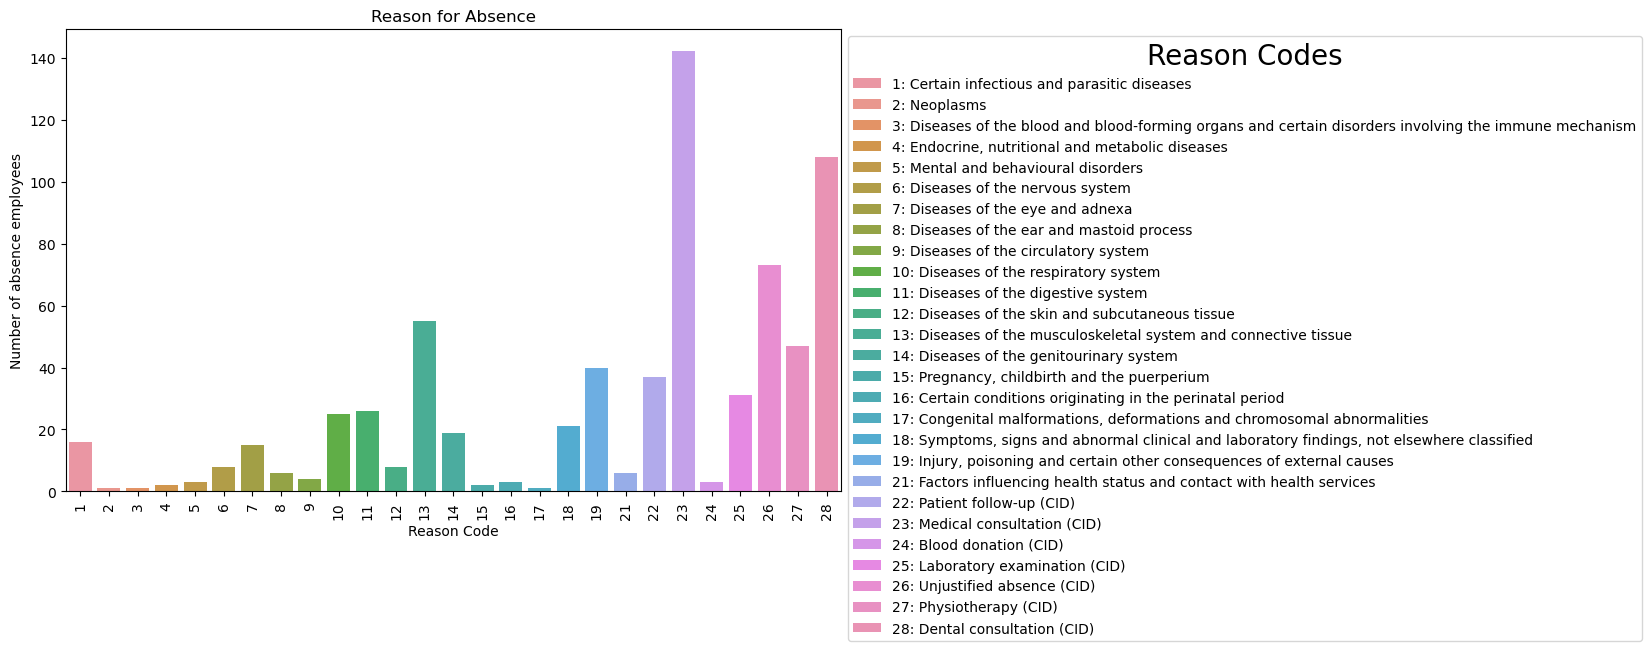

In [21]:
# Visualize the "Reason for absence" column
reason_counts = df['Reason for absence'].value_counts().sort_index()

# Create a dictionary to map the reason codes to their descriptions
reason_dict = {
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up (CID)',
    23: 'Medical consultation (CID)',
    24: 'Blood donation (CID)',
    25: 'Laboratory examination (CID)',
    26: 'Unjustified absence (CID)',
    27: 'Physiotherapy (CID)',
    28: 'Dental consultation (CID)'
}

# Create a bar plot
plt.figure(figsize=(10,6))
bar_plot = sns.barplot(x=reason_counts.index, y=reason_counts)
plt.title('Reason for Absence')
plt.xlabel('Reason Code')
plt.ylabel('Number of absent employees')
plt.xticks(rotation=90)

# Create a custom legend
legend_labels = [f'{code}: {reason_dict[code]}' for code in reason_counts.index]
legend = plt.legend(handles=bar_plot.patches, labels=legend_labels, title='Reason Codes', bbox_to_anchor=(1, 1))
plt.setp(legend.get_title(), fontsize='20')

plt.show()

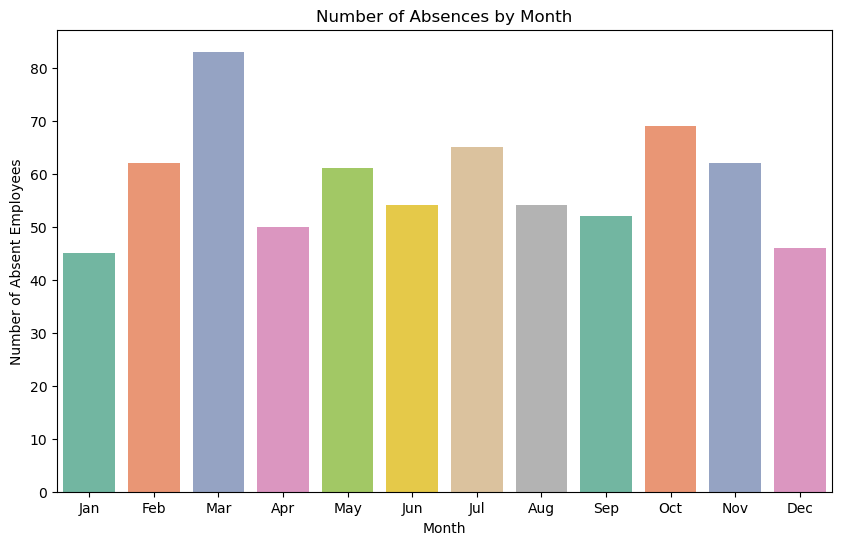

In [111]:
# Visualize the 'Month of absence' column
month_counts = df['Month of absence'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=month_counts.index, y=month_counts, palette='Set2')
plt.title('Number of Absences by Month')
plt.xlabel('Month')
plt.ylabel('Number of Absent Employees')
plt.xticks()

# Set the x-axis tick labels as month numbers
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(12), month_labels)

plt.show()

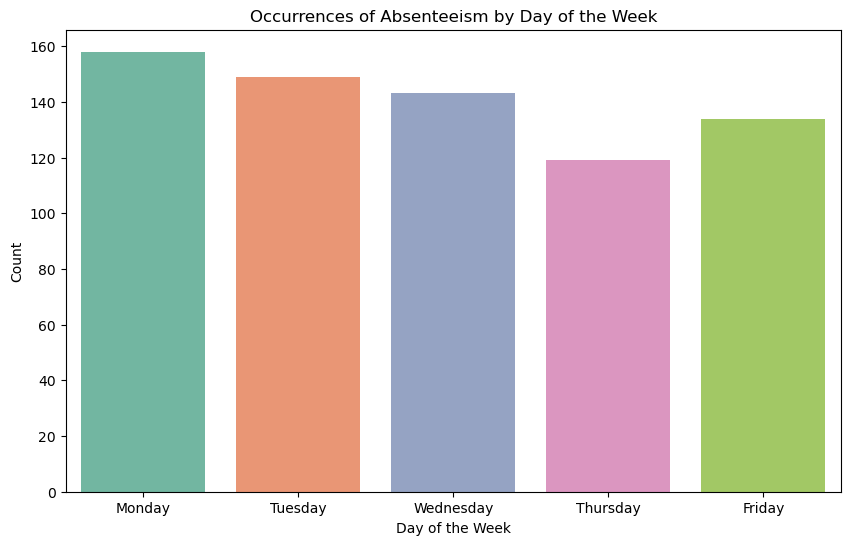

In [23]:
# Count the occurrences of each day of the week
day_counts = df["Day of the week"].value_counts()

# Create a bar plot with the same color scheme
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=day_counts.index, y=day_counts, palette='Set2')

# Set the plot title and axis labels
plt.title("Occurrences of Absenteeism by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")

# Set the x-axis tick labels as day names
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.xticks(range(5), day_labels)

plt.show()

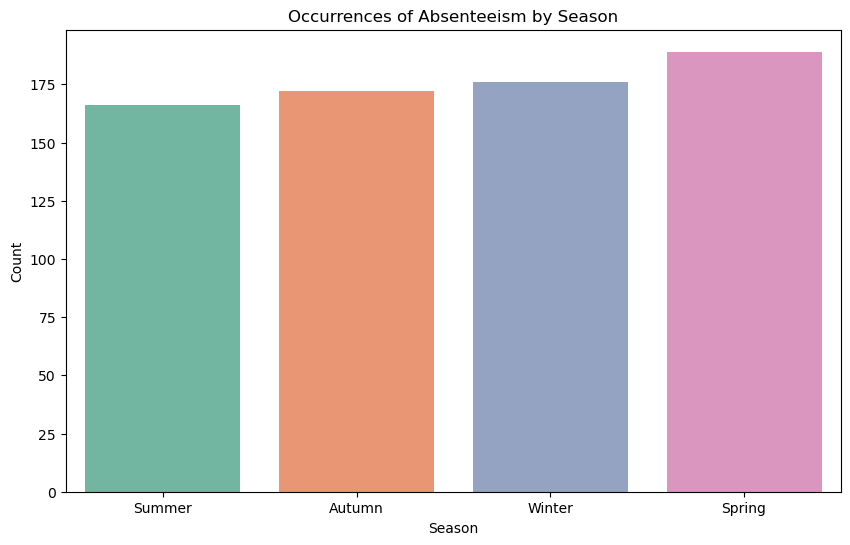

In [24]:
# Count the occurrences of each season
season_counts = df["Seasons"].value_counts()

# Create a bar plot with color scheme
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=season_counts.index, y=season_counts, palette='Set2')

# Set the plot title and axis labels
plt.title("Occurrences of Absenteeism by Season")
plt.xlabel("Season")
plt.ylabel("Number of Employees")

# Set the x-axis tick labels as season names
season_labels = ['Summer', 'Autumn', 'Winter', 'Spring']
plt.xticks(range(4), season_labels)

plt.show()

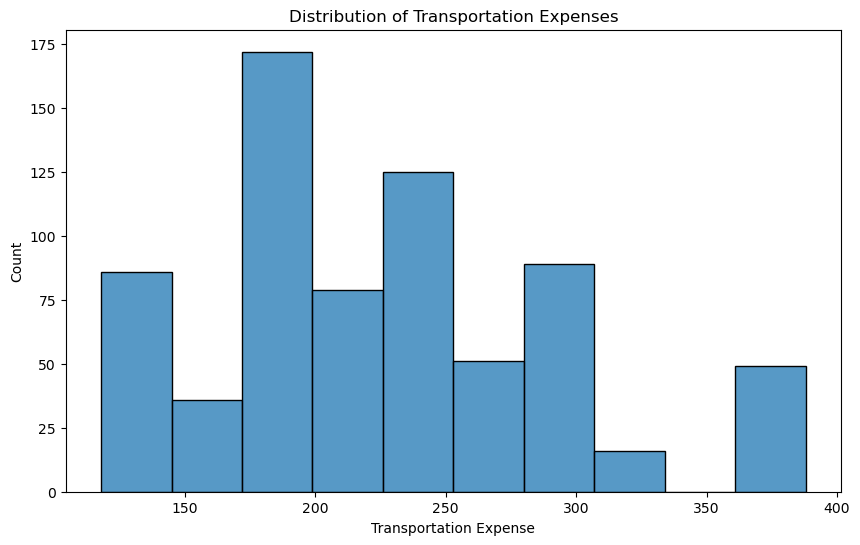

In [25]:
# Create a histogram plot
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(data = df, x="Transportation expense", bins=10)

# Set the plot title and axis labels
plt.title("Distribution of Transportation Expenses")
plt.xlabel("Transportation Expense")
plt.ylabel("Number of Employees")

plt.show()


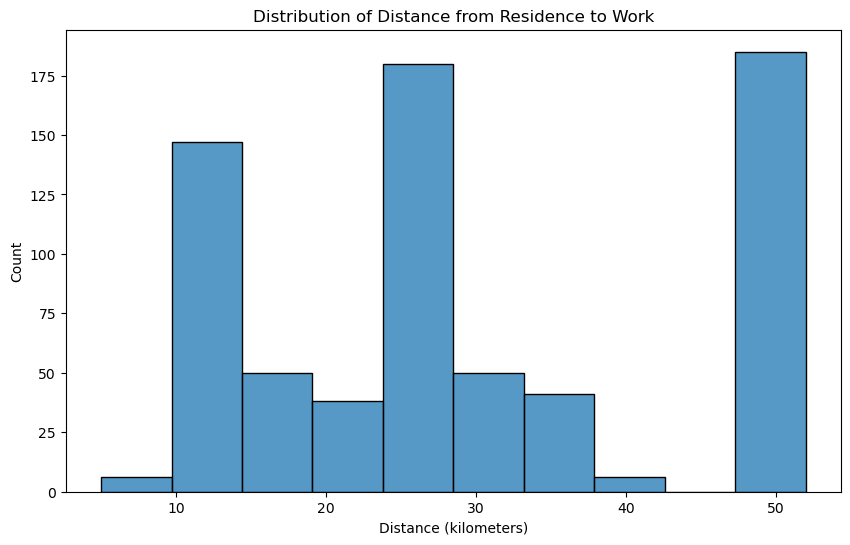

In [26]:
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(data=df, x="Distance from Residence to Work", bins=10)
plt.title("Distribution of Distance from Residence to Work")
plt.xlabel("Distance (kilometers)")
plt.ylabel("Number of Employees")
plt.show()

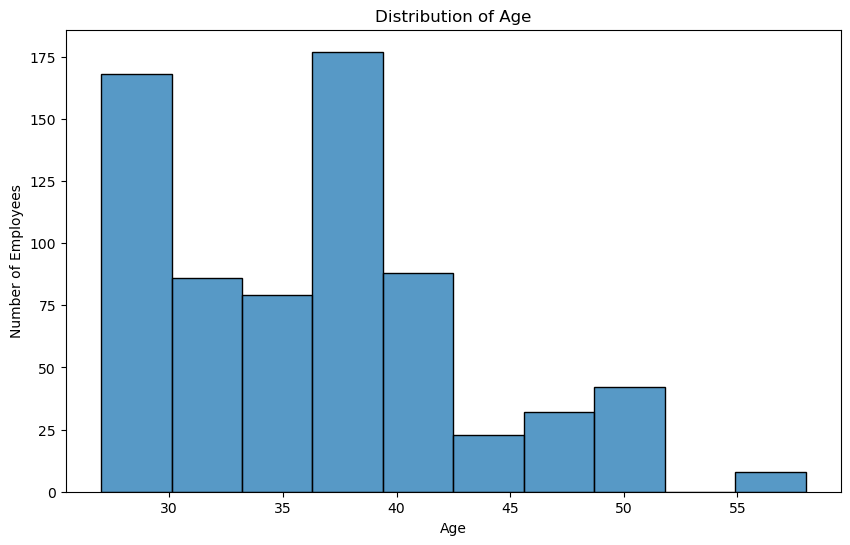

In [112]:
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(data=df, x="Age", bins=10)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show()

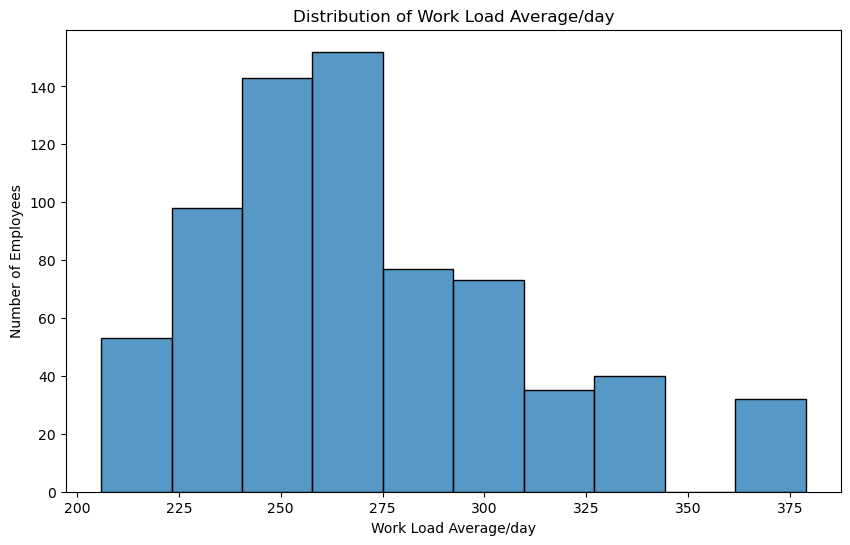

In [113]:
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(data=df, x="Work load Average/day ", bins=10)
plt.title("Distribution of Work Load Average/day")
plt.xlabel("Work Load Average/day")
plt.ylabel("Number of Employees")
plt.show()


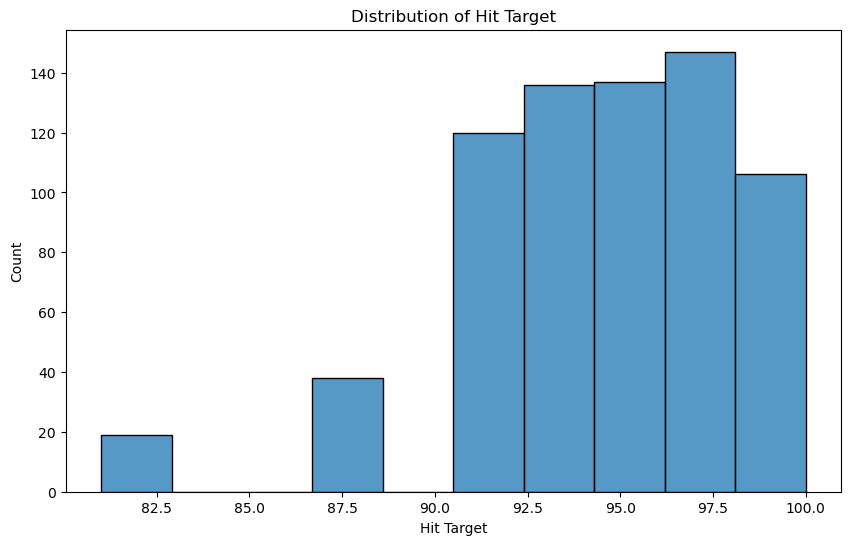

In [29]:
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(data=df, x="Hit target", bins=10)
plt.title("Distribution of Hit Target")
plt.xlabel("Hit Target")
plt.ylabel("Number of Employees")
plt.show()


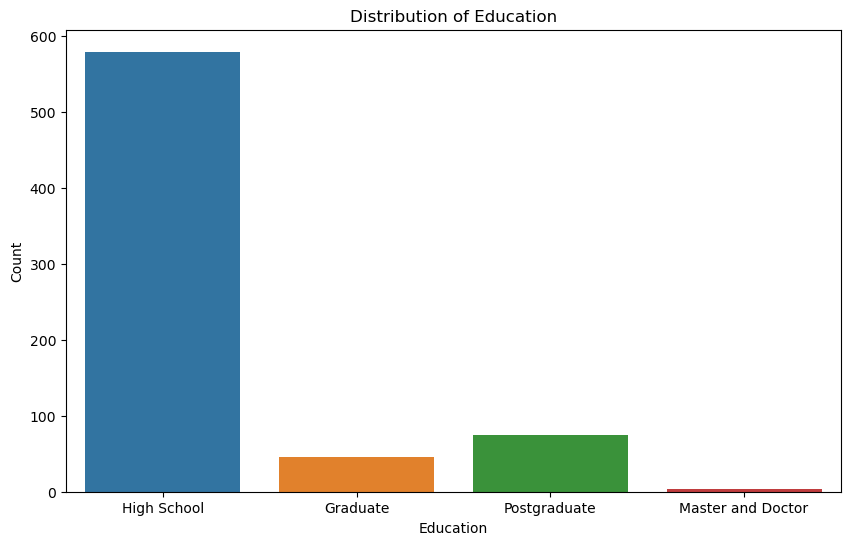

In [30]:
# Count the occurrences of each education level
education_counts = df['Education'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=education_counts.index, y=education_counts)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Number of Employees')

# Set the x-axis tick labels with the education levels
education_labels = ['High School', 'Graduate', 'Postgraduate', 'Master and Doctor']
plt.xticks(range(len(education_labels)), education_labels)

plt.show()


### 2.2: Exploring the relationships between pairs of columns

In [31]:
selected_pairs = [('Transportation expense', 'Distance from Residence to Work'),
                  ('Age', 'Body mass index'),
                  ('Reason for absence', 'Month of absence'),
                  ('Son', 'Pet'),
                  ('Day of the week', 'Seasons'),
                  ('Work load Average/day ', 'Age'),
                  ('Education', 'Age'),
                  ('Weight', 'Height'),
                  ('Social drinker', 'Social smoker'),
                  ('Hit target', 'Disciplinary failure')]

In [32]:
# Select the 'Transportation expense' and 'Distance from Residence to Work' columns
pair1 = ['Transportation expense', 'Distance from Residence to Work']
pair1_data = df[pair1]

# Calculate the correlation coefficient
correlation = pair1_data.corr().iloc[0, 1]

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.2777753723677345


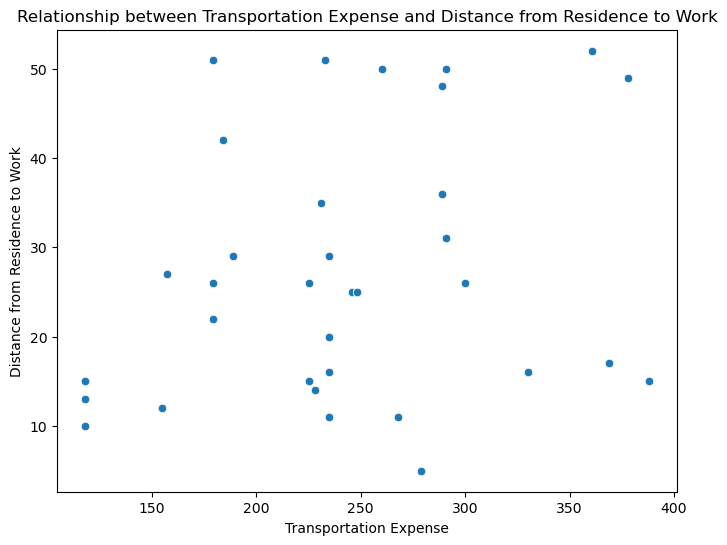

In [33]:
# Create a scatter plot with color differentiation
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df, x='Transportation expense', y='Distance from Residence to Work')

# Set the title and axis labels
plt.title('Relationship between Transportation Expense and Distance from Residence to Work')
plt.xlabel('Transportation Expense')
plt.ylabel('Distance from Residence to Work')

plt.show()

In [34]:
age_stats = df['Age'].describe()
bmi_stats = df['Body mass index'].describe()

print("Age Statistics:")
print(age_stats)
print("\nBody Mass Index Statistics:")
print(bmi_stats)

Age Statistics:
count    703.000000
mean      36.446657
std        6.545670
min       27.000000
25%       31.000000
50%       37.000000
75%       40.000000
max       58.000000
Name: Age, dtype: float64

Body Mass Index Statistics:
count    703.000000
mean      26.615932
std        4.242691
min       19.000000
25%       24.000000
50%       25.000000
75%       31.000000
max       38.000000
Name: Body mass index, dtype: float64


In [35]:
df['Body mass index'].unique()

array([30, 31, 24, 27, 23, 25, 29, 32, 22, 33, 21, 28, 38, 19, 36, 35])

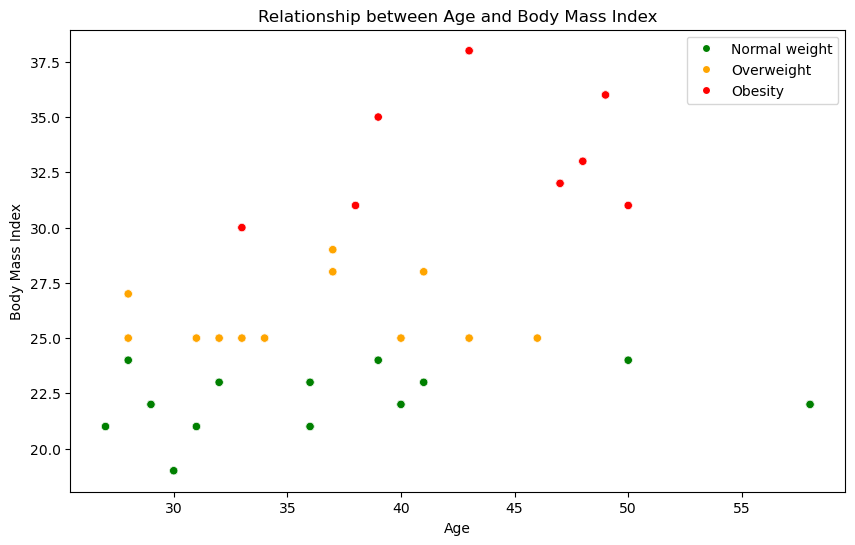

In [36]:
color_palette = {'Normal weight': 'green', 'Overweight': 'orange', 'Obesity': 'red'}

# Create a scatter plot with color-coded BMI categories
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=df['Age'], y=df['Body mass index'],
                               hue=df['Body mass index'].apply(
                                   lambda x: 'Normal weight' if 18.5 <= x <= 24.9 else (
                                       'Overweight' if 25 <= x <= 29.9 else 'Obesity')),
                               palette=color_palette)

# Customize legend
handles, labels = scatter_plot.get_legend_handles_labels()
legend_labels = ['Normal weight', 'Overweight', 'Obesity']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_palette[label]) for label in
                    legend_labels]
plt.legend(legend_elements, legend_labels)

# Set plot title and axis labels
plt.title('Relationship between Age and Body Mass Index')
plt.xlabel('Age')
plt.ylabel('Body Mass Index')

plt.show()

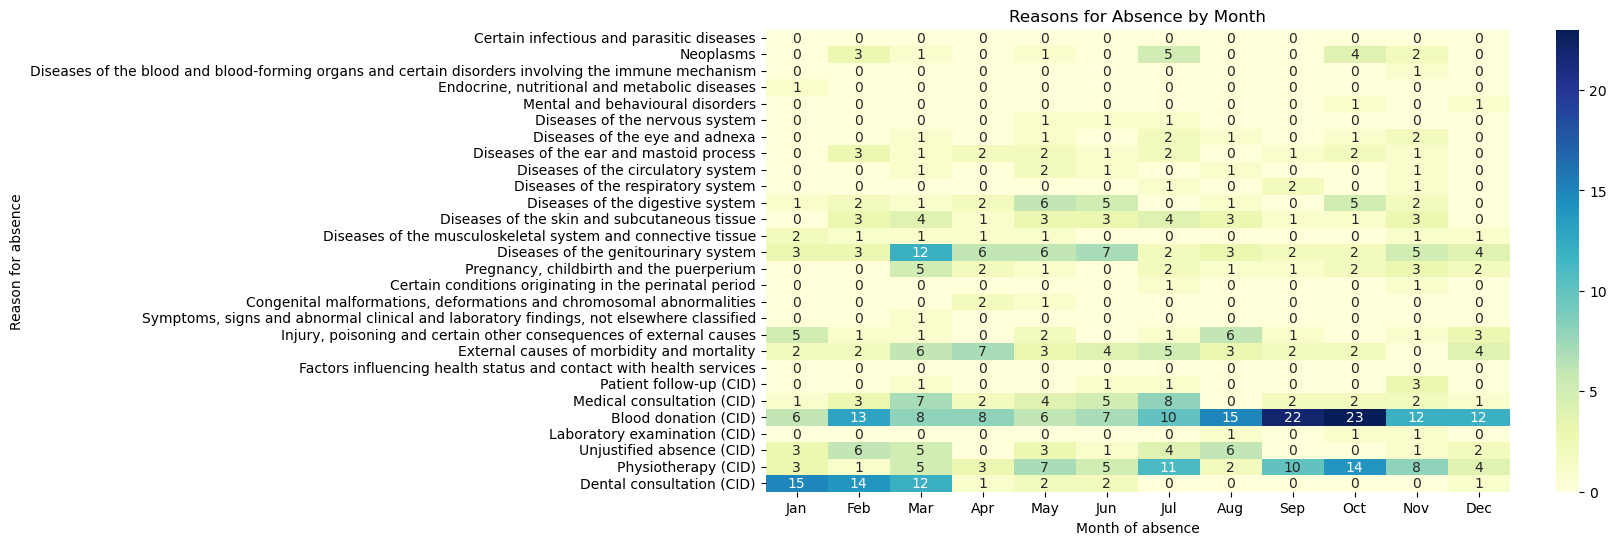

In [38]:
reason_month_matrix = np.zeros((len(reason_dict), 12))

# Iterate over the dataset and fill the matrix with the frequency counts
for i, reason in enumerate(reason_dict):
    for month in range(1, 13):
        count = len(df[(df['Reason for absence'] == i) & (df['Month of absence'] == month)])
        reason_month_matrix[i, month-1] = count

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(reason_month_matrix, cmap='YlGnBu', annot=True, fmt='g')

# Set plot title and axis labels
plt.title('Reasons for Absence by Month')
plt.xlabel('Month of absence')
plt.ylabel('Reason for absence')

# Set the x-axis tick labels as month numbers
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + 0.5, month_labels)
plt.yticks(np.arange(len(reason_dict)) + 0.5, reason_dict.values(), rotation=0)

plt.show()

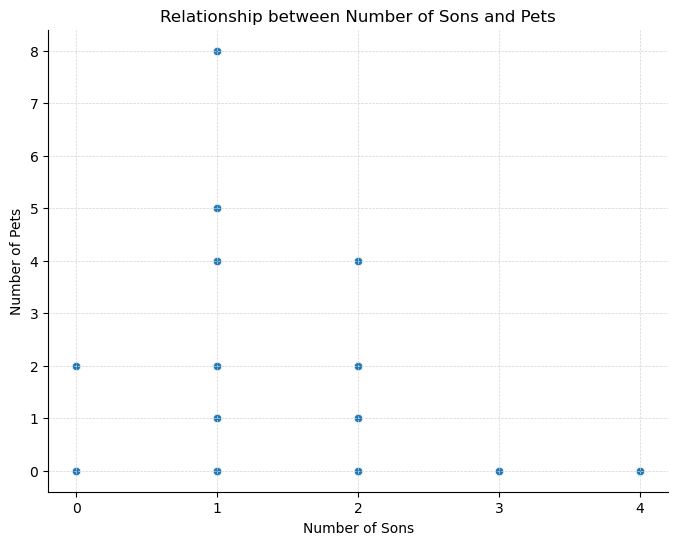

In [41]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Create a scatter plot
scatter_plot = sns.scatterplot(data=df, x='Son', y='Pet', alpha=1)
plt.xticks(np.arange(df['Son'].min(), df['Son'].max()+1))


# Set the axis labels and title
plt.xlabel('Number of Sons')
plt.ylabel('Number of Pets')
plt.title('Relationship between Number of Sons and Pets')

# Customize the plot appearance
scatter_plot.spines['top'].set_visible(False)
scatter_plot.spines['right'].set_visible(False)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)


# Show the plot
plt.show()

In [42]:
# Calculate descriptive statistics
workload_stats = df['Work load Average/day '].describe()
hittarget_stats = df['Hit target'].describe()
# Print the descriptive statistics
print("Work load Average/day Statistics:\n", workload_stats)
print("\nHit target Statistics:\n", hittarget_stats)

Work load Average/day Statistics:
 count    703.000000
mean     272.093701
std       39.542963
min      205.917000
25%      244.387000
50%      264.604000
75%      294.217000
max      378.884000
Name: Work load Average/day , dtype: float64

Hit target Statistics:
 count    703.000000
mean      94.546230
std        3.811859
min       81.000000
25%       92.000000
50%       95.000000
75%       97.000000
max      100.000000
Name: Hit target, dtype: float64


<Figure size 800x600 with 0 Axes>

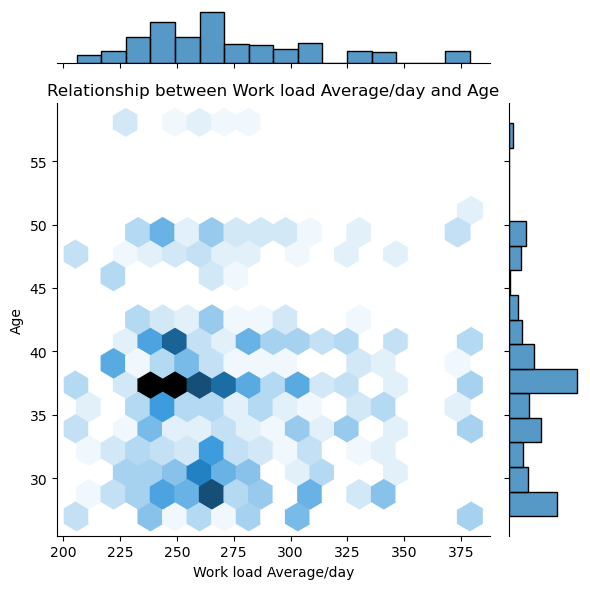

In [43]:
# Create a joint plot
plt.figure(figsize=(8, 6))
joint_plot = sns.jointplot(data=df, x='Work load Average/day ', y='Age', kind='hex')

# Set the axis labels and title
plt.xlabel('Work load Average/day')
plt.ylabel('Age')
plt.title('Relationship between Work load Average/day and Age')
plt.tight_layout()

# Show the plot
plt.show()

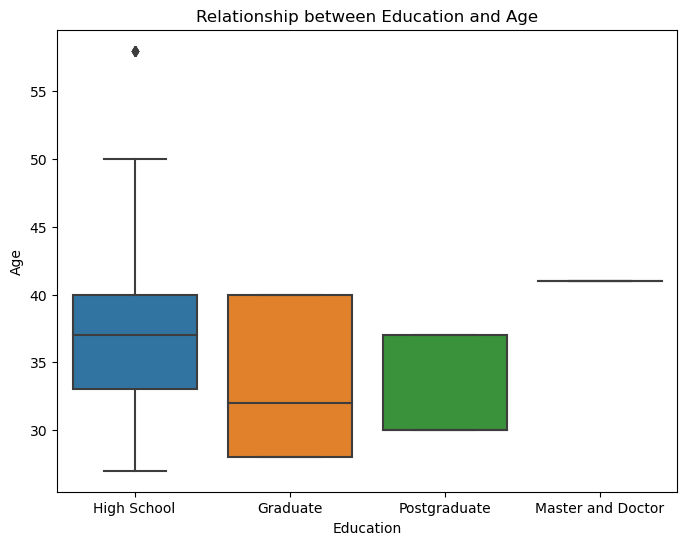

In [44]:
education_labels = ['High School', 'Graduate', 'Postgraduate', 'Master and Doctor']

# Create a box plot
plt.figure(figsize=(8, 6))
box_plot = sns.boxplot(data=df, x='Education', y='Age')

# Set the x-axis tick labels as the defined education level labels
plt.xticks(ticks=[0, 1, 2, 3], labels=education_labels)

# Set the axis labels and title
plt.xlabel('Education')
plt.ylabel('Age')
plt.title('Relationship between Education and Age')

# Show the plot
plt.show()

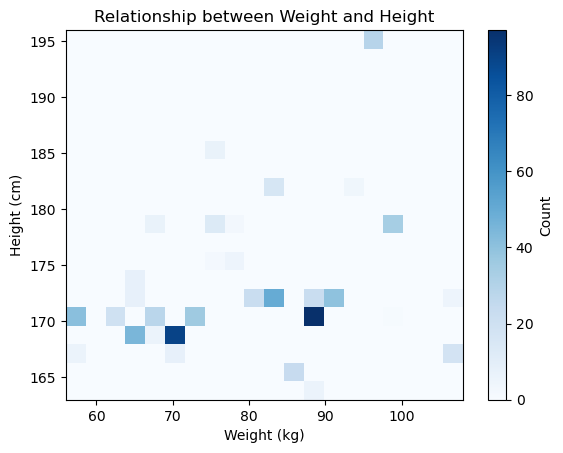

In [45]:
# Create a 2D histogram
plt.hist2d(df['Weight'], df['Height'], bins=20, cmap='Blues')

# Set plot title and labels
plt.title('Relationship between Weight and Height')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')

# Add a colorbar
plt.colorbar(label='Count')

# Show the plot
plt.show()

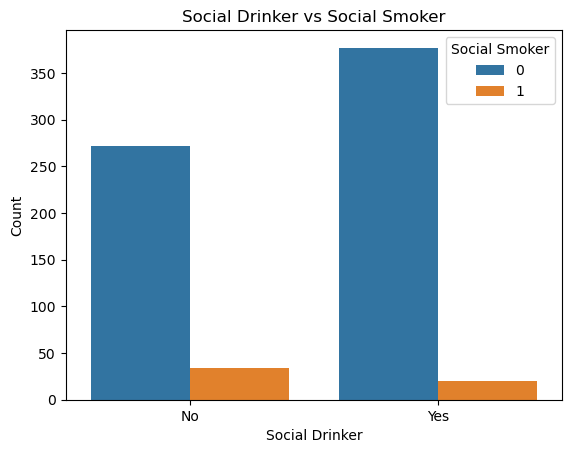

In [46]:
# Grouped bar plot for Social Drinker and Social Smoker
sns.countplot(x='Social drinker', hue='Social smoker', data=df)
plt.title('Social Drinker vs Social Smoker')
plt.xlabel('Social Drinker')
plt.ylabel('Count')

# Change x-axis tick labels
plt.xticks([0, 1], ['No', 'Yes'])

# Add legend
plt.legend(title='Social Smoker', loc='upper right')

plt.show()

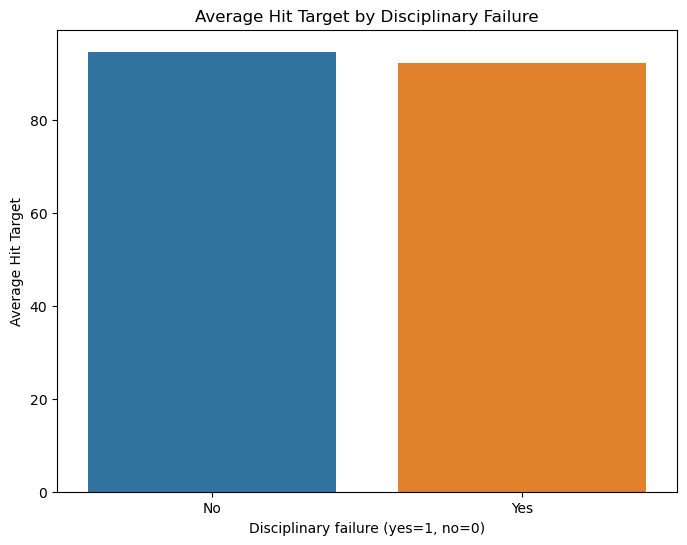

In [47]:
# Group the data by 'Disciplinary Failure' and calculate the average 'Hit Target' for each group
grouped_data = df.groupby('Disciplinary failure')['Hit target'].mean()
labels = {0: 'No', 1: 'Yes'}

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped_data.index.map(labels), y=grouped_data)
plt.title('Average Hit Target by Disciplinary Failure')
plt.xlabel('Disciplinary failure (yes=1, no=0)')
plt.ylabel('Average Hit Target')
plt.show()

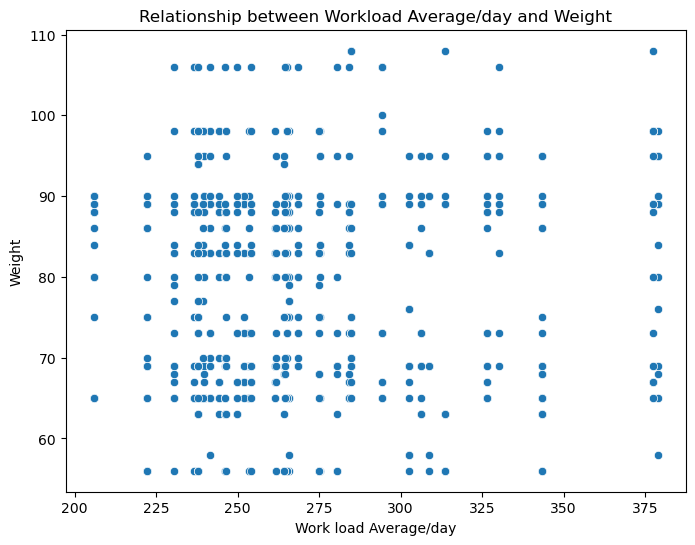

In [120]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Work load Average/day ', y='Weight', data=df)
plt.title('Relationship between Workload Average/day and Weight')
plt.xlabel('Work load Average/day')
plt.ylabel('Weight')
plt.show()

### 2.3: Exploring a meaningful question

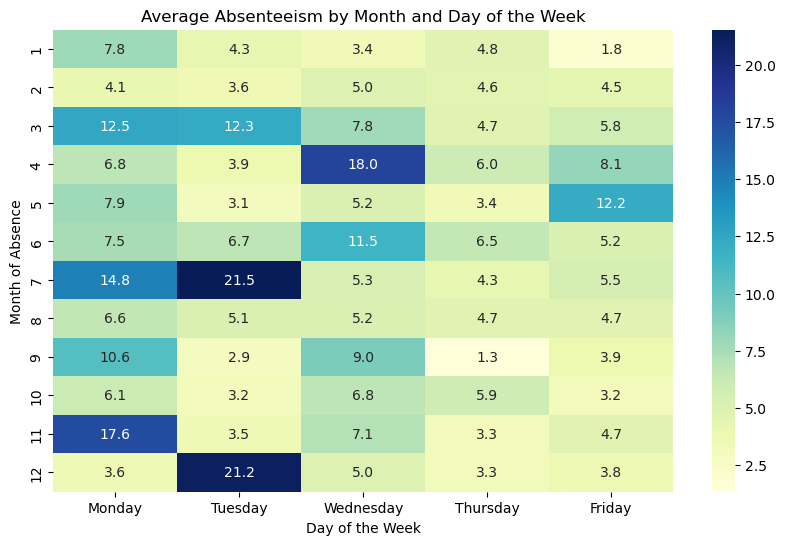

In [50]:
# Create a pivot table to calculate the average number of absences per month and day of the week
pivot_table = df.pivot_table(index='Month of absence', columns='Day of the week', values='Absenteeism time in hours', aggfunc=np.mean)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Average Absenteeism by Month and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month of Absence')

# Set the tick labels
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.xticks(np.arange(0.5, len(pivot_table.columns), 1), weekday_labels)
plt.yticks(np.arange(0.5, len(pivot_table.index), 1), pivot_table.index)

plt.show()

## Task 3: Data Modelling 

### Step 3.1: Splitting the data into training and test sets for different ratios


In [51]:
X = df.drop('Absenteeism time in hours', axis=1)  # Exclude the target variable from features
y = df['Absenteeism time in hours']  # Specify the target variable

# Make sure the shapes of X and y are compatible
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (703, 20)
Shape of y: (703,)


In [52]:
# Suite 1: 50% training, 50% testing
X_train_suite1, X_test_suite1, y_train_suite1, y_test_suite1 = train_test_split(X, y, test_size=0.5, random_state=1)

# Suite 2: 60% training, 40% testing
X_train_suite2, X_test_suite2, y_train_suite2, y_test_suite2 = train_test_split(X, y, test_size=0.4, random_state=1)

# Suite 3: 80% training, 20% testing
X_train_suite3, X_test_suite3, y_train_suite3, y_test_suite3 = train_test_split(X, y, test_size=0.2, random_state=1)


### Step 3.2: Training and evaluating the models on each suite

In [53]:
# Create an instance of the Decision Tree Classifier
model1 = DecisionTreeClassifier()

In [55]:
# Training and Evaluation for Suite 1
model1.fit(X_train_suite1, y_train_suite1)
y_train_pred1 = model1.predict(X_train_suite1)
y_test_pred1 = model1.predict(X_test_suite1)

print("Decision Tree Classifier - Suite 1")
print("Confusion Matrix (Training Set):")
print(confusion_matrix(y_train_suite1, y_train_pred1))
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test_suite1, y_test_pred1))

print("Classification Accuracy (Training Set):", accuracy_score(y_train_suite1, y_train_pred1))
print("Classification Accuracy (Test Set):", accuracy_score(y_test_suite1, y_test_pred1))

print("Precision (Training Set):", precision_score(y_train_suite1, y_train_pred1, average='weighted', zero_division=0))
print("Precision (Test Set):", precision_score(y_test_suite1, y_test_pred1, average='weighted', zero_division=0))

print("Recall (Training Set):", recall_score(y_train_suite1, y_train_pred1, average='weighted', zero_division=0))
print("Recall (Test Set):", recall_score(y_test_suite1, y_test_pred1, average='weighted', zero_division=0))

print("F1 Score (Training Set):", f1_score(y_train_suite1, y_train_pred1, average='weighted', zero_division=0))
print("F1 Score (Test Set):", f1_score(y_test_suite1, y_test_pred1, average='weighted', zero_division=0))


Decision Tree Classifier - Suite 1
Confusion Matrix (Training Set):
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 67  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2 50  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 98  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]]
Confusion Mat

In [56]:
# Training and Evaluation for Suite 2
model1.fit(X_train_suite2, y_train_suite2)
y_train_pred2 = model1.predict(X_train_suite2)
y_test_pred2 = model1.predict(X_test_suite2)

print("Decision Tree Classifier - Suite 2")
print("Confusion Matrix (Training Set):")
print(confusion_matrix(y_train_suite2, y_train_pred2))
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test_suite2, y_test_pred2))

print("Classification Accuracy (Training Set):", accuracy_score(y_train_suite2, y_train_pred2))
print("Classification Accuracy (Test Set):", accuracy_score(y_test_suite2, y_test_pred2))

print("Precision (Training Set):", precision_score(y_train_suite2, y_train_pred2, average='weighted', zero_division=0))
print("Precision (Test Set):", precision_score(y_test_suite2, y_test_pred2, average='weighted', zero_division=0))

print("Recall (Training Set):", recall_score(y_train_suite2, y_train_pred2, average='weighted', zero_division=0))
print("Recall (Test Set):", recall_score(y_test_suite2, y_test_pred2, average='weighted', zero_division=0))

print("F1 Score (Training Set):", f1_score(y_train_suite2, y_train_pred2, average='weighted', zero_division=0))
print("F1 Score (Test Set):", f1_score(y_test_suite2, y_test_pred2, average='weighted', zero_division=0))


Decision Tree Classifier - Suite 2
Confusion Matrix (Training Set):
[[ 30   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  48   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  80   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   2  55   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   4   0  28   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 124   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  14   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0

In [ ]:
# Training and Evaluation for Suite 2
model1.fit(X_train_suite2, y_train_suite2)
y_train_pred2 = model1.predict(X_train_suite2)
y_test_pred2 = model1.predict(X_test_suite2)

print("Decision Tree Classifier - Suite 2")
print("Confusion Matrix (Training Set):")
print(confusion_matrix(y_train_suite2, y_train_pred2))
print("Classification Report (Training Set):")
print(classification_report(y_train_suite2, y_train_pred2, zero_division=0))

print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test_suite2, y_test_pred2))
print("Classification Report (Test Set):")
print(classification_report(y_test_suite2, y_test_pred2, zero_division=0))

In [57]:
# Training and Evaluation for Suite 3
model1.fit(X_train_suite3, y_train_suite3)
y_train_pred3 = model1.predict(X_train_suite3)
y_test_pred3 = model1.predict(X_test_suite3)

print("Decision Tree Classifier - Suite 3")
print("Confusion Matrix (Training Set):")
print(confusion_matrix(y_train_suite3, y_train_pred3))
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test_suite3, y_test_pred3))

print("Classification Accuracy (Training Set):", accuracy_score(y_train_suite3, y_train_pred3))
print("Classification Accuracy (Test Set):", accuracy_score(y_test_suite3, y_test_pred3))

print("Precision (Training Set):", precision_score(y_train_suite3, y_train_pred3, average='weighted', zero_division=0))
print("Precision (Test Set):", precision_score(y_test_suite3, y_test_pred3, average='weighted', zero_division=0))

print("Recall (Training Set):", recall_score(y_train_suite3, y_train_pred3, average='weighted', zero_division=0))
print("Recall (Test Set):", recall_score(y_test_suite3, y_test_pred3, average='weighted', zero_division=0))

print("F1 Score (Training Set):", f1_score(y_train_suite3, y_train_pred3, average='weighted', zero_division=0))
print("F1 Score (Test Set):", f1_score(y_test_suite3, y_test_pred3, average='weighted', zero_division=0))

Decision Tree Classifier - Suite 3
Confusion Matrix (Training Set):
[[ 35   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  70   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 107   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   6  72   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   4   1  42   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 166   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  17   0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   0   0   1   0  13   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0

#### Step 2:

In [63]:
# Create an instance of Logistic Regression
model2 = LogisticRegression(solver='liblinear')

In [64]:
# Training and Evaluation for Suite 1
model2.fit(X_train_suite1, y_train_suite1)
y_train_pred1 = model2.predict(X_train_suite1)
y_test_pred1 = model2.predict(X_test_suite1)

print("Logistic Regression - Suite 1")
print("Confusion Matrix (Training Set):")
print(confusion_matrix(y_train_suite1, y_train_pred1))
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test_suite1, y_test_pred1))

print("Classification Accuracy (Training Set):", accuracy_score(y_train_suite1, y_train_pred1))
print("Classification Accuracy (Test Set):", accuracy_score(y_test_suite1, y_test_pred1))

print("Precision (Training Set):", precision_score(y_train_suite1, y_train_pred1, average='weighted', zero_division=0))
print("Precision (Test Set):", precision_score(y_test_suite1, y_test_pred1, average='weighted', zero_division=0))

print("Recall (Training Set):", recall_score(y_train_suite1, y_train_pred1, average='weighted', zero_division=0))
print("Recall (Test Set):", recall_score(y_test_suite1, y_test_pred1, average='weighted', zero_division=0))

print("F1 Score (Training Set):", f1_score(y_train_suite1, y_train_pred1, average='weighted', zero_division=0))
print("F1 Score (Test Set):", f1_score(y_test_suite1, y_test_pred1, average='weighted', zero_division=0))


Logistic Regression - Suite 1
Confusion Matrix (Training Set):
[[23  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13 12  3  2  0  0 11  0  0  0  0  0  0  0  0  0]
 [ 0  4 38 11  4  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  2 16 19  0  0  0 15  0  0  0  0  0  1  0  0  0]
 [ 0  1  8  3  6  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 11  3  1  0  0 75  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  9  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  1  0  0  0  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]]
Confusion Matrix (

In [65]:
# Training and Evaluation for Suite 2
model2.fit(X_train_suite2, y_train_suite2)
y_train_pred2 = model2.predict(X_train_suite2)
y_test_pred2 = model2.predict(X_test_suite2)

print("Logistic Regression - Suite 2")
print("Confusion Matrix (Training Set):")
print(confusion_matrix(y_train_suite2, y_train_pred2))
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test_suite2, y_test_pred2))

print("Classification Accuracy (Training Set):", accuracy_score(y_train_suite2, y_train_pred2))
print("Classification Accuracy (Test Set):", accuracy_score(y_test_suite2, y_test_pred2))

print("Precision (Training Set):", precision_score(y_train_suite2, y_train_pred2, average='weighted', zero_division=0))
print("Precision (Test Set):", precision_score(y_test_suite2, y_test_pred2, average='weighted', zero_division=0))

print("Recall (Training Set):", recall_score(y_train_suite2, y_train_pred2, average='weighted', zero_division=0))
print("Recall (Test Set):", recall_score(y_test_suite2, y_test_pred2, average='weighted', zero_division=0))

print("F1 Score (Training Set):", f1_score(y_train_suite2, y_train_pred2, average='weighted', zero_division=0))
print("F1 Score (Test Set):", f1_score(y_test_suite2, y_test_pred2, average='weighted', zero_division=0))


Logistic Regression - Suite 2
Confusion Matrix (Training Set):
[[ 29   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  13  16   4   1   0   0  14   0   0   0   0   0   0   0   0   0]
 [  0   6  48   7   6   0   0  13   0   0   0   0   0   0   0   0   0]
 [  0   2  26   6   2   0   0  22   0   0   0   0   0   0   0   0   0]
 [  0   1  10   0   9   0   0  11   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   2  15   4   1   0   0 100   0   1   0   0   0   0   1   0   0]
 [  0   0   1   0   2   0   0  11   0   0   0   0   0   0   0   0   0]
 [  0   1   1   1   0   0   0  11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   5   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   1 

In [66]:
# Training and Evaluation for Suite 3
model2.fit(X_train_suite3, y_train_suite3)
y_train_pred3 = model2.predict(X_train_suite3)
y_test_pred3 = model2.predict(X_test_suite3)

print("Logistic Regression - Suite 3")
print("Confusion Matrix (Training Set):")
print(confusion_matrix(y_train_suite3, y_train_pred3))
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test_suite3, y_test_pred3))

print("Classification Accuracy (Training Set):", accuracy_score(y_train_suite3, y_train_pred3))
print("Classification Accuracy (Test Set):", accuracy_score(y_test_suite3, y_test_pred3))

print("Precision (Training Set):", precision_score(y_train_suite3, y_train_pred3, average='weighted', zero_division=0))
print("Precision (Test Set):", precision_score(y_test_suite3, y_test_pred3, average='weighted', zero_division=0))

print("Recall (Training Set):", recall_score(y_train_suite3, y_train_pred3, average='weighted', zero_division=0))
print("Recall (Test Set):", recall_score(y_test_suite3, y_test_pred3, average='weighted', zero_division=0))

print("F1 Score (Training Set):", f1_score(y_train_suite3, y_train_pred3, average='weighted', zero_division=0))
print("F1 Score (Test Set):", f1_score(y_test_suite3, y_test_pred3, average='weighted', zero_division=0))

Logistic Regression - Suite 3
Confusion Matrix (Training Set):
[[ 34   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  23  22   2   0   0   0  23   0   0   0   0   0   0   0   0   0]
 [  0   9  64   4   8   0   0  22   0   0   0   0   0   0   0   0   0]
 [  0   7  33   8   5   0   0  26   0   0   0   0   0   0   0   0   0]
 [  0   6  13   3  10   0   0  15   0   0   0   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   8  19   3   1   0   0 134   0   1   0   0   0   0   0   0   0]
 [  0   0   3   0   0   0   0  14   0   0   0   0   0   0   0   0   0]
 [  0   1   1   1   0   0   0  13   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   5   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   1   0 

#### 3.3

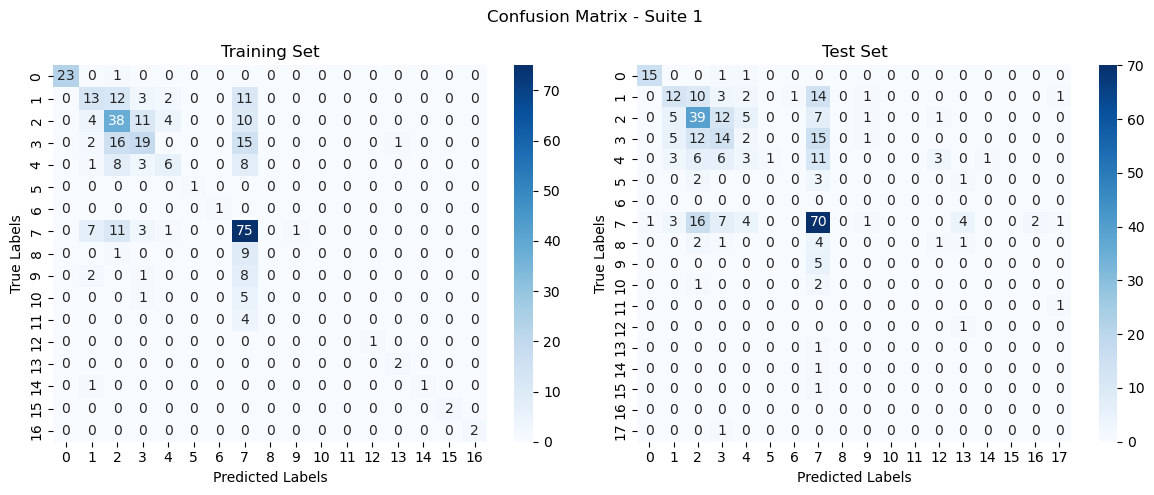

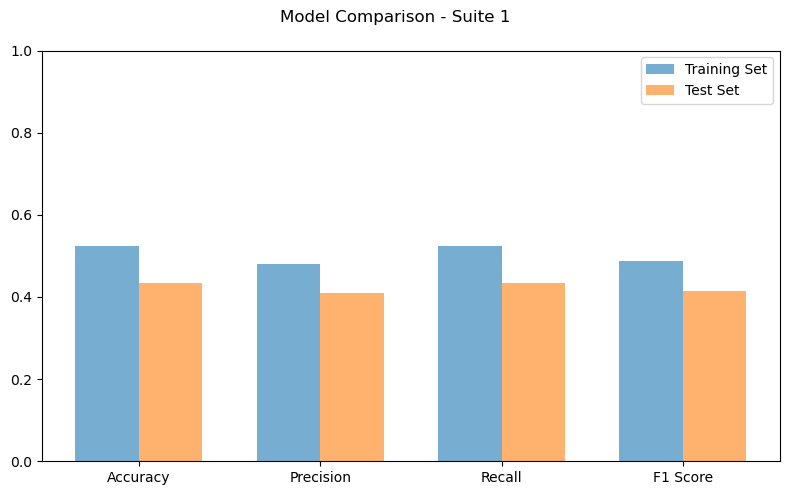

In [108]:
# Confusion Matrix
train_cm = confusion_matrix(y_train_suite1, y_train_pred1)
test_cm = confusion_matrix(y_test_suite1, y_test_pred1)

# Accuracy comparison
train_accuracy = accuracy_score(y_train_suite1, y_train_pred1)
test_accuracy = accuracy_score(y_test_suite1, y_test_pred1)

# Precision comparison
train_precision = precision_score(y_train_suite1, y_train_pred1, average='weighted', zero_division=0)
test_precision = precision_score(y_test_suite1, y_test_pred1, average='weighted', zero_division=0)

# Recall comparison
train_recall = recall_score(y_train_suite1, y_train_pred1, average='weighted', zero_division=0)
test_recall = recall_score(y_test_suite1, y_test_pred1, average='weighted', zero_division=0)

# F1 Score comparison
train_f1 = f1_score(y_train_suite1, y_train_pred1, average='weighted', zero_division=0)
test_f1 = f1_score(y_test_suite1, y_test_pred1, average='weighted', zero_division=0)

# Plotting the confusion matrix
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle('Confusion Matrix - Suite 1')

sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Training Set')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Test Set')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

# Plotting the metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_metrics = [train_accuracy, train_precision, train_recall, train_f1]
test_metrics = [test_accuracy, test_precision, test_recall, test_f1]

fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle('Model Comparison - Suite 1')

x = np.arange(len(labels))
width = 0.35

ax.bar(x - width/2, train_metrics, width, label='Training Set', alpha=0.6)
ax.bar(x + width/2, test_metrics, width, label='Test Set', alpha=0.6)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, 1])
ax.legend()

plt.tight_layout()
plt.show()


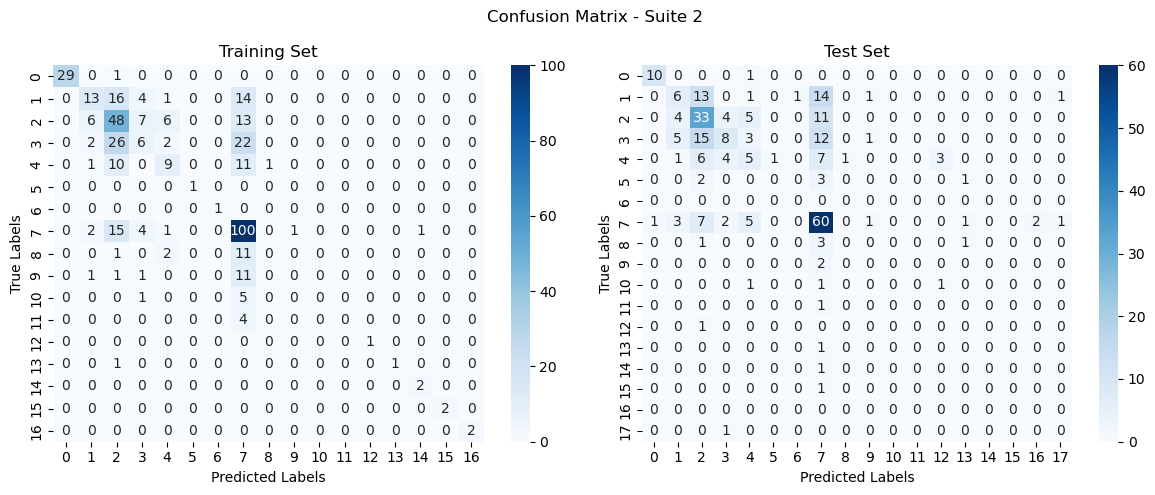

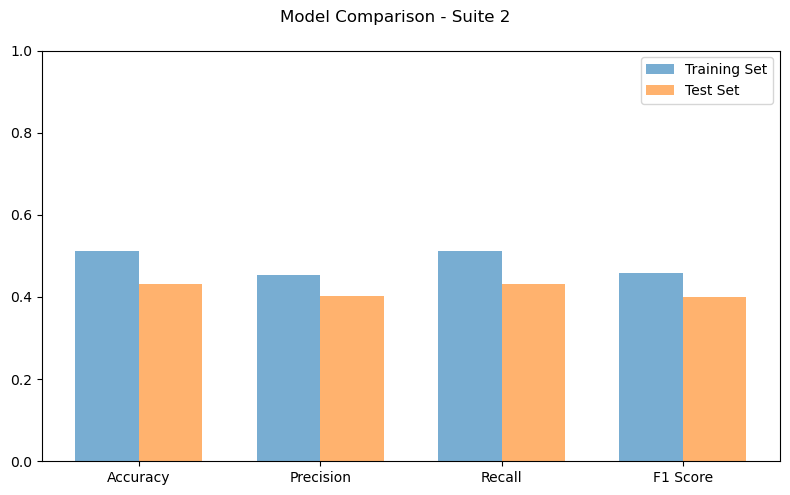

In [110]:
# Confusion Matrix
train_cm = confusion_matrix(y_train_suite2, y_train_pred2)
test_cm = confusion_matrix(y_test_suite2, y_test_pred2)

# Accuracy comparison
train_accuracy = accuracy_score(y_train_suite2, y_train_pred2)
test_accuracy = accuracy_score(y_test_suite2, y_test_pred2)

# Precision comparison
train_precision = precision_score(y_train_suite2, y_train_pred2, average='weighted', zero_division=0)
test_precision = precision_score(y_test_suite2, y_test_pred2, average='weighted', zero_division=0)

# Recall comparison
train_recall = recall_score(y_train_suite2, y_train_pred2, average='weighted', zero_division=0)
test_recall = recall_score(y_test_suite2, y_test_pred2, average='weighted', zero_division=0)

# F1 Score comparison
train_f1 = f1_score(y_train_suite2, y_train_pred2, average='weighted', zero_division=0)
test_f1 = f1_score(y_test_suite2, y_test_pred2, average='weighted', zero_division=0)

# Plotting the confusion matrix
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle('Confusion Matrix - Suite 2')

sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Training Set')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Test Set')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

# Plotting the metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_metrics = [train_accuracy, train_precision, train_recall, train_f1]
test_metrics = [test_accuracy, test_precision, test_recall, test_f1]

fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle('Model Comparison - Suite 2')

x = np.arange(len(labels))
width = 0.35

ax.bar(x - width/2, train_metrics, width, label='Training Set', alpha=0.6)
ax.bar(x + width/2, test_metrics, width, label='Test Set', alpha=0.6)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, 1])
ax.legend()

plt.tight_layout()
plt.show()


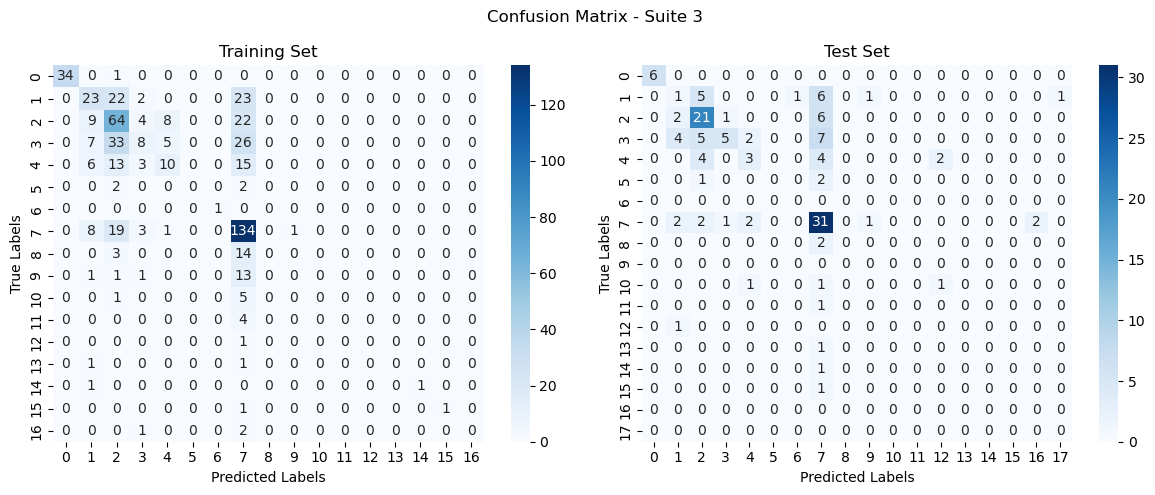

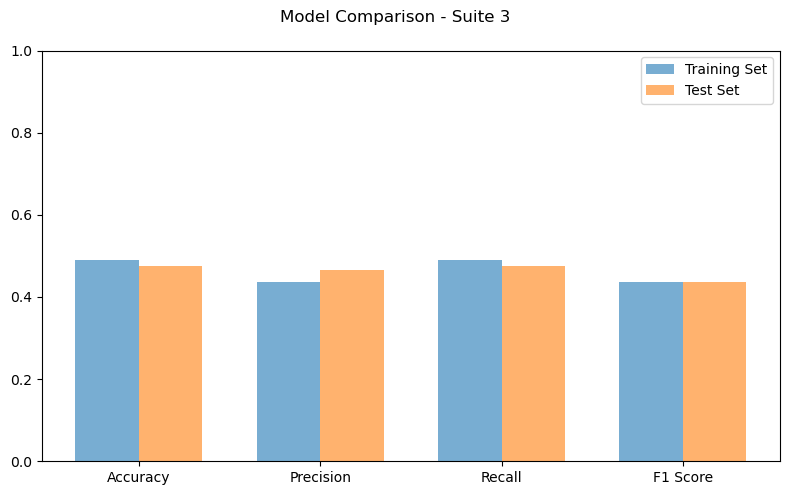

In [109]:
# Confusion Matrix
train_cm = confusion_matrix(y_train_suite3, y_train_pred3)
test_cm = confusion_matrix(y_test_suite3, y_test_pred3)

# Accuracy comparison
train_accuracy = accuracy_score(y_train_suite3, y_train_pred3)
test_accuracy = accuracy_score(y_test_suite3, y_test_pred3)

# Precision comparison
train_precision = precision_score(y_train_suite3, y_train_pred3, average='weighted', zero_division=0)
test_precision = precision_score(y_test_suite3, y_test_pred3, average='weighted', zero_division=0)

# Recall comparison
train_recall = recall_score(y_train_suite3, y_train_pred3, average='weighted', zero_division=0)
test_recall = recall_score(y_test_suite3, y_test_pred3, average='weighted', zero_division=0)

# F1 Score comparison
train_f1 = f1_score(y_train_suite3, y_train_pred3, average='weighted', zero_division=0)
test_f1 = f1_score(y_test_suite3, y_test_pred3, average='weighted', zero_division=0)

# Plotting the confusion matrix
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.suptitle('Confusion Matrix - Suite 3')

sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Training Set')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Test Set')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

# Plotting the metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_metrics = [train_accuracy, train_precision, train_recall, train_f1]
test_metrics = [test_accuracy, test_precision, test_recall, test_f1]

fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle('Model Comparison - Suite 3')

x = np.arange(len(labels))
width = 0.35

ax.bar(x - width/2, train_metrics, width, label='Training Set', alpha=0.6)
ax.bar(x + width/2, test_metrics, width, label='Test Set', alpha=0.6)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, 1])
ax.legend()

plt.tight_layout()
plt.show()
